In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook


In [3]:
#Import ML models

In [4]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor


In [5]:
#Import Error Metrics

In [6]:
from sklearn.metrics import r2_score

In [7]:
#Import Preprocessing

In [8]:
from sklearn import preprocessing

In [9]:
#Read in datafile

In [10]:
df_LSOA_EnergyConsumption_ResPropertySales = pd.read_csv('1_DataCleaning/LSOAEnergyConsumption_ResPropertySales.csv')

In [11]:
#Split df_LSOA_EnergyConsumption_ResPropertySales dataset 80:20

In [12]:
msk = np.random.rand(len(df_LSOA_EnergyConsumption_ResPropertySales)) < 0.8

In [13]:
train = df_LSOA_EnergyConsumption_ResPropertySales[msk]
test = df_LSOA_EnergyConsumption_ResPropertySales[~msk]

In [14]:
#First pass decision tree regressor

In [15]:
regr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)

In [16]:
x_train = np.asanyarray(train[['Mean_price_paid','Year']])
y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])

print(x_train)
print(y_train)

[[567304.70099     2010.       ]
 [700060.972345    2013.       ]
 [757966.7238375   2014.       ]
 ...
 [187262.7973075   2014.       ]
 [174013.2832275   2015.       ]
 [190899.55613     2017.       ]]
[[4500.50330813]
 [4218.691202  ]
 [4375.        ]
 ...
 [3813.        ]
 [3698.157158  ]
 [3430.960776  ]]


In [17]:
#Preprocessing with standard scaler

In [18]:
x_scaled = preprocessing.robust_scale(x_train)
y_scaled = preprocessing.robust_scale(y_train)

print(x_scaled)
print(y_scaled)

[[ 2.36780361 -1.        ]
 [ 3.20895316 -0.25      ]
 [ 3.57584653  0.        ]
 ...
 [-0.04015851  0.        ]
 [-0.12410801  0.25      ]
 [-0.01711585  0.75      ]]
[[ 0.91423118]
 [ 0.57772128]
 [ 0.76436855]
 ...
 [ 0.09328821]
 [-0.04384484]
 [-0.36290221]]


In [19]:
x_scaled.mean(axis=0)

array([0.30755953, 0.00076075])

In [20]:
x_scaled.std(axis=0)

array([1.3281996 , 0.64571501])

In [21]:
regr.fit(x_scaled, y_scaled.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
y_hat = regr.predict(test[['Mean_price_paid','Year']])

In [23]:
x = preprocessing.robust_scale(np.asanyarray(test[['Mean_price_paid']]))
y = preprocessing.robust_scale(np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']]))

In [24]:
x.shape

(62452, 1)

In [25]:
y.shape

(62452, 1)

In [26]:
y_hat.shape

(62452,)

In [27]:
y = np.squeeze(y)
y.shape

(62452,)

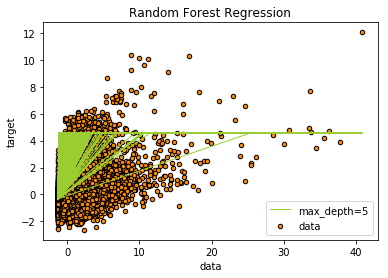

In [28]:
# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(x, y_hat, color="yellowgreen",
         label="max_depth=5", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [29]:
MAE = np.mean(np.absolute(y_hat - y))
MSE = np.mean((y_hat - y) ** 2)
RMSE = np.sqrt(MSE)
R2 = r2_score(y , y_hat)


print("Mean absolute error (MAE): %.2f" % MAE)
print("Residual sum of squares (MSE): %.2f" % MSE)
print("Root Residual sum of squares (RMSE): %.2f" % RMSE)
print("R2-score: %.2f" % R2)

Mean absolute error (MAE): 4.30
Residual sum of squares (MSE): 19.66
Root Residual sum of squares (RMSE): 4.43
R2-score: -17.13
